In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#importing dataset

In [2]:
data=pd.read_csv("MoviesOnStreamingPlatforms_updated[1].csv")


#Dataset information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       9515 non-null   int64  
 1   ID               9515 non-null   int64  
 2   Title            9515 non-null   object 
 3   Year             9515 non-null   int64  
 4   Age              5338 non-null   object 
 5   IMDb             9309 non-null   object 
 6   Rotten Tomatoes  9508 non-null   object 
 7   Netflix          9515 non-null   int64  
 8   Hulu             9515 non-null   int64  
 9   Prime Video      9515 non-null   int64  
 10  Disney+          9515 non-null   int64  
 11  Type             9515 non-null   int64  
 12  Directors        9104 non-null   object 
 13  Genres           9399 non-null   object 
 14  Country          9261 non-null   object 
 15  Language         9202 non-null   object 
 16  Runtime          9196 non-null   float64
dtypes: float64(1),

#Stastical analysis

In [4]:
data.describe()

,Unnamed: 0,ID,Year,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.0,9196.000000
mean,4757.000000,4758.000000,2007.422386,0.388334,0.110037,0.432265,0.096900,0.0,95.199435
std,2746.888239,2746.888239,19.130367,0.487397,0.312952,0.495417,0.295837,0.0,29.654047
min,0.000000,1.000000,1914.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,2378.500000,2379.500000,2006.000000,0.000000,0.000000,0.000000,0.000000,0.0,85.000000
50%,4757.000000,4758.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.0,95.000000
75%,7135.500000,7136.500000,2018.000000,1.000000,0.000000,1.000000,0.000000,0.0,109.000000
max,9514.000000,9515.000000,2021.000000,1.000000,1.000000,1.000000,1.000000,0.0,566.000000


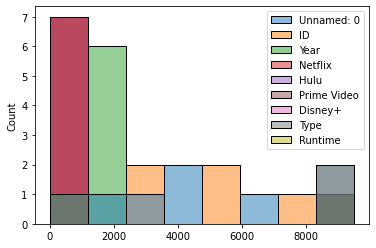

In [5]:
sns.histplot(data.describe());

#Dropping column

In [6]:
data.drop(columns="Unnamed: 0",inplace=True)


In [7]:
data.head()


,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,5,Roma,2018,18+,7.7/10,94/100,1,0,0,0,0,NaN,"Action,Drama,History,Romance,War","United Kingdom,United States",English,52.0


#Percentage Of Missing Values

In [8]:
data.isna().mean()*100


ID                  0.000000
Title               0.000000
Year                0.000000
Age                43.899107
IMDb                2.165003
Rotten Tomatoes     0.073568
Netflix             0.000000
Hulu                0.000000
Prime Video         0.000000
Disney+             0.000000
Type                0.000000
Directors           4.319496
Genres              1.219128
Country             2.669469
Language            3.289543
Runtime             3.352601
dtype: float64

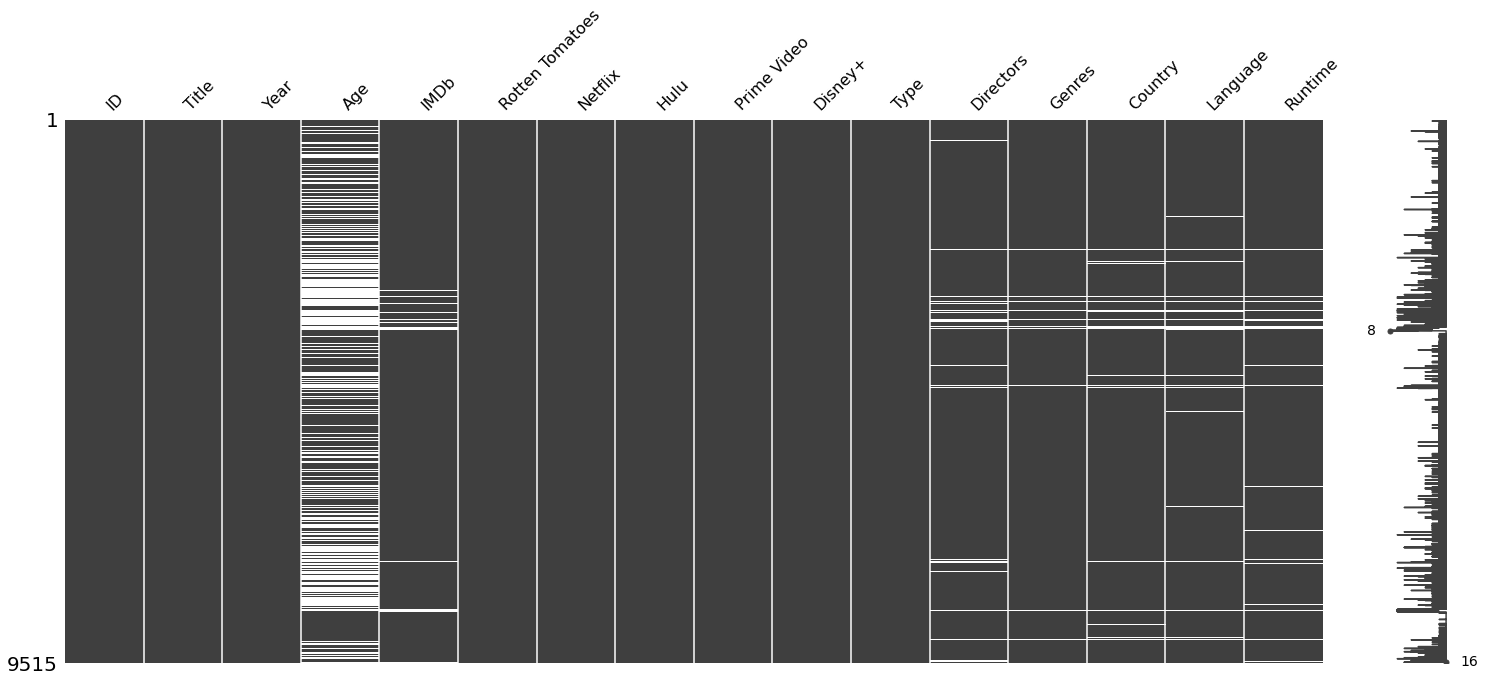

In [9]:
import missingno as msno
%matplotlib inline
msno.matrix(data)

#Dropping the less important column with high missing values

In [10]:
data.drop(["Age","Type"],axis=1,inplace=True)
data.dropna(axis=0,inplace=True,how="any")
data["ID"]=[i for i in range(len(data))]
data.set_index("ID",inplace=True)

#Converting IMDB and Rotten Tomatoes from Fraction to float

In [11]:
data["IMDb"] = [float(score[0:3]) for score in data["IMDb"]]
data["Rotten Tomatoes"] = [float(score[0:2]) for score in data["Rotten Tomatoes"]]

#To check the gender in the dataset

In [12]:
genres=[]
for s in data.Genres.dropna():
  l=s.split(sep=",")
  for s2 in l:
    if not( s2 in genres ):
      genres.append(s2)
print(genres)
print(len(genres))

['Biography', 'Crime', 'Drama', 'Action', 'Sport', 'Documentary', 'Musical', 'Comedy', 'Romance', 'Adventure', 'Sci-Fi', 'Mystery', 'Western', 'History', 'Thriller', 'War', 'Music', 'Animation', 'Fantasy', 'Horror', 'Family', 'Short', 'Reality-TV', 'Talk-Show', 'News', 'Film-Noir']
26


#The countries associated with the movie:

In [13]:
country=[]
for s in data.Country.dropna():
  l=s.split(sep=",")
  for s2 in l:
    if not( s2 in country ):
      country.append(s2)
print(country)
print(len(country))

['United States', 'India', 'United Kingdom', 'Australia', 'Kenya', 'Namibia', 'South Korea', 'Canada', 'Congo - Brazzaville', 'Hungary', 'Hong Kong SAR China', 'Ukraine', 'France', 'Malawi', 'Thailand', 'Japan', 'Indonesia', 'Poland', 'Germany', 'Argentina', 'Spain', 'Belgium', 'Ireland', 'Italy', 'Switzerland', 'Mexico', 'Czechia', 'Bahamas', 'Iceland', 'China', 'Brazil', 'Norway', 'Uruguay', 'South Africa', 'Netherlands', 'Taiwan', 'Qatar', 'Israel', 'Georgia', 'New Zealand', 'Cambodia', 'Romania', 'Senegal', 'Malta', 'Russia', 'Greece', 'Turkey', 'Sweden', 'Denmark', 'Chile', 'Jordan', 'Colombia', 'Austria', 'Ghana', 'Saudi Arabia', 'Serbia', 'Iran', 'Morocco', 'Egypt', 'Luxembourg', 'Finland', 'United Arab Emirates', 'Philippines', 'Lebanon', 'Pakistan', 'Portugal', 'Bermuda', 'Ecuador', 'Singapore', 'Bulgaria', 'Peru', 'Palestinian Territories', 'Lithuania', 'Bosnia & Herzegovina', 'Serbia and Montenegro', 'Vietnam', 'West Germany', 'Cayman Islands', 'Malaysia', 'Nigeria', 'Réunio

#The language that we have:

In [14]:
language=[]
for s in data.Language.dropna():
  l=s.split(sep=",")
  for s2 in l:
    if not( s2 in language ):
      language.append(s2)
print(language)
print(len(language))

['English', 'Italian', 'Latin', 'Spanish', 'German', 'Hindi', 'Korean', 'French', 'East-Greenlandic', 'Swahili', 'Cantonese', 'Ukrainian', 'Russian', 'Mandarin', 'Arabic', 'Nyanja', 'Hungarian', 'Bangla', 'Dinka', 'Tamil', 'Indonesian', 'Hebrew', 'Serbian', 'Icelandic', 'Portuguese', 'American Sign Language', 'Irish', 'Romanian', 'Chinese', 'Aboriginal', 'Swedish', 'Polish', 'Norwegian', 'Bulgarian', 'Dutch', 'Quechua', 'Esperanto', 'Japanese', 'Sioux', 'Pawnee', 'Bhojpuri', 'Punjabi', 'Georgian', 'Thai', 'Albanian', 'Wolof', 'Japanese Sign Language', 'Saami', 'Yiddish', 'Manipuri', 'Xhosa', 'Basque', 'Swiss German', 'Filipino', 'Turkish', 'Marathi', 'Washoe', 'Danish', 'Navajo', 'Turkmen', 'Amharic', 'Tibetan', 'Brazilian Sign Language', 'Akan', 'Persian', 'Telugu', 'Khmer', 'Armenian', 'Scottish Gaelic', 'Slovenian', 'Catalan', 'Finnish', 'Vietnamese', 'Pashto', 'None', 'Afrikaans', 'Flemish', 'Urdu', 'Tagalog', 'Sanskrit', 'Greek', 'Hawaiian', 'Kurdish', 'Malayalam', 'Serbo-Croatian

#Group by Directors with IMDB

In [15]:
data[['IMDb','Directors']].groupby('Directors').agg(['mean','count']).sort_values(by=('IMDb','mean'), ascending=False)


IMDb      
                          mean count
Directors                           
Jason Docter,Matt Docter  9.80     1
PJ Moynihan               9.20     1
Amadeusz Kocan            9.15     2
Samir Al Asfory           9.00     1
Dennis M. Lynch           9.00     1
...                        ...   ...
Sajid Khan                1.70     1
David Rambaldi            1.60     1
Sasha Burrow              1.50     1
S.A. Zaidi                1.50     1
Jason Wright              1.10     1

[6327 rows x 2 columns]

#Sorting

In [16]:
directors = data[['IMDb','Directors']].groupby('Directors').agg(['mean','count'])
directors[directors[('IMDb', 'count')] > 5].sort_values(by=('IMDb','mean'), ascending=False).head(10)

IMDb      
                     mean count
Directors                      
Tim Gray         7.550000     6
Martin Scorsese  7.520000    10
James Algar      7.350000     8
Youssef Chahine  7.333333     6
Ben Sharpsteen   7.316667     6
John Ford        7.300000     6
Shannon Hartman  7.300000     8
Tim Burton       7.285714     7
Jack Hannah      7.230000    10
Wilfred Jackson  7.190000    10

In [17]:
streams = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
dict_a = {}
for stream in streams:
    a = data[['IMDb', stream]].groupby([stream]).agg(['mean',
        'count']).iloc[1,:].values
    dict_a[stream] = a
    df_stream = pd.DataFrame(dict_a, 
                index=['Avg_IMDb','Number of Moviews'])
df_stream

,Netflix,Hulu,Prime Video,Disney+
Avg_IMDb,6.276842,6.216934,5.964306,6.547863
Number of Moviews,3325.000000,998.000000,3799.000000,819.000000


#Creating score with IMDB

In [18]:
df=data
df["Score"]=2
for i,n in enumerate(df.IMDb):
  if 0<=n<3.0:
    df.loc[i,"Score"]=0
  elif 3.0<=n<5.0:
    df.loc[i,"Score"]=1
  elif 5.0<=n<8.0:
    df.loc[i,"Score"]=2
  elif 8.0<=n<9.0:
    df.loc[i,"Score"]=3
  elif 9.0<=n<10.0:
    df.loc[i,"Score"]=4

In [19]:
data


,Title,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,Score
ID,,,,,,,,,,,,,,
0,The Irishman,2019,7.8,98.0,1,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0,2
1,Dangal,2016,8.4,97.0,1,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0,3
2,David Attenborough: A Life on Our Planet,2020,9.0,95.0,1,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0,4
3,Lagaan: Once Upon a Time in India,2001,8.1,94.0,1,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0,3
4,To All the Boys I've Loved Before,2018,7.1,94.0,1,0,0,0,Susan Johnson,"Comedy,Drama,Romance",United States,English,99.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8690,Penguins: Life on the Edge,2020,6.9,37.0,0,0,0,1,"Alastair Fothergill,Jeff Wilson","Documentary,Family",United States,"English,French",78.0,2
8691,Man Among Cheetahs,2017,7.0,35.0,0,0,0,1,Richard Slater-Jones,Documentary,United States,English,44.0,2
8692,Sultan And The Rock Star,1980,5.6,34.0,0,0,0,1,Edward M. Abroms,"Adventure,Drama,Family",United States,English,60.0,2


#Score rotten with Rotten Tomatoes

In [20]:
df=data
df["ScoreROTTEN"]=2
for i,n in enumerate(df["Rotten Tomatoes"]):
      n=n/10  
      if 0<=n<3.0:
        df.loc[i,"ScoreROTTEN"]=0
      elif 3.0<=n<5.0:
        df.loc[i,"ScoreROTTEN"]=1
      elif 5.0<=n<8.0:
        df.loc[i,"ScoreROTTEN"]=2
      elif 8.0<=n<9.0:
        df.loc[i,"ScoreROTTEN"]=3
      elif 9.0<=n<10.0:
        df.loc[i,"ScoreROTTEN"]=4

#checking nulls after dropping and replacing it with mean

In [21]:
data.isna().sum()

Title              0
Year               0
IMDb               0
Rotten Tomatoes    0
Netflix            0
Hulu               0
Prime Video        0
Disney+            0
Directors          0
Genres             0
Country            0
Language           0
Runtime            0
Score              0
ScoreROTTEN        0
dtype: int64

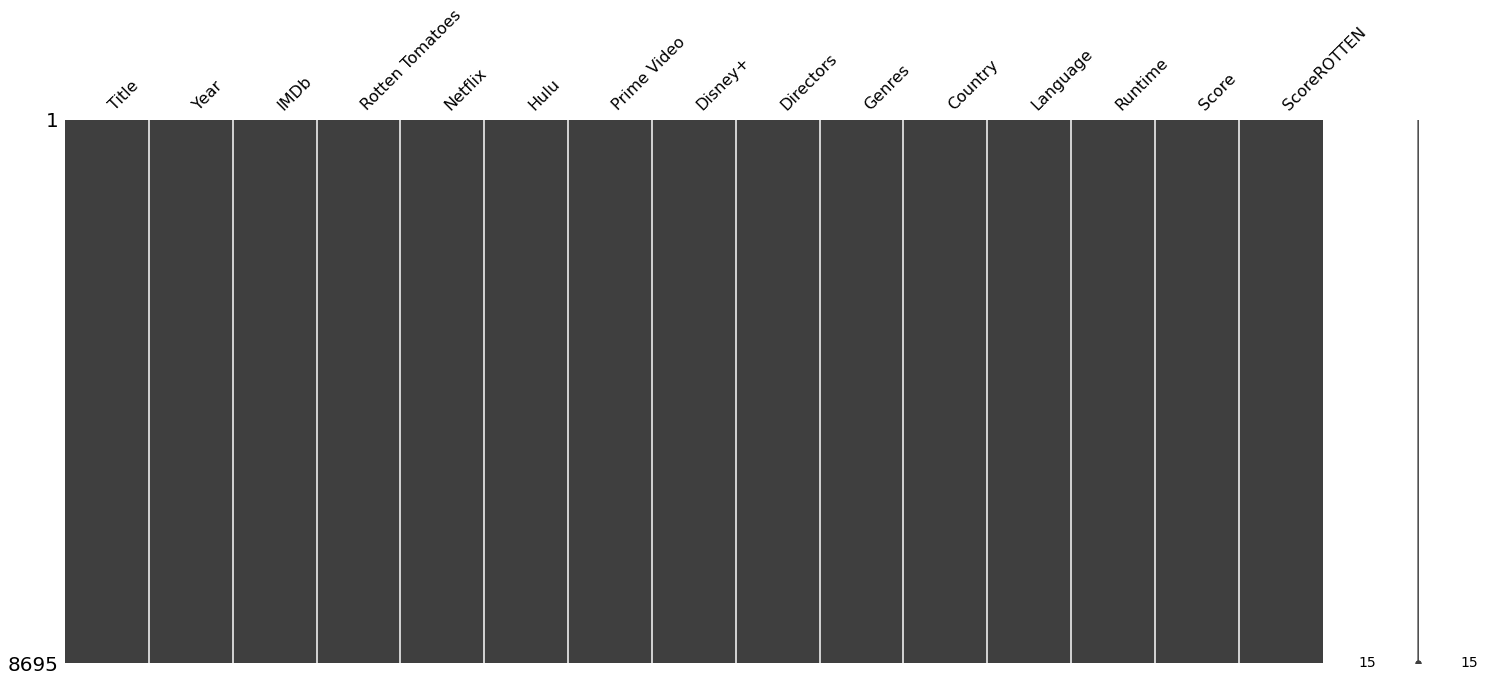

In [22]:
import missingno as msno
%matplotlib inline
msno.matrix(data)

#Rating with OTT

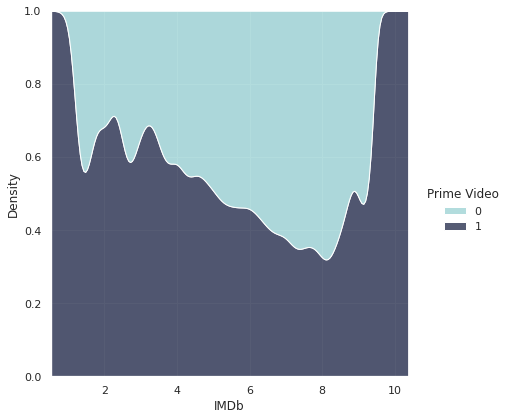

In [23]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.displot(
    data=data,
    x="IMDb", hue="Prime Video",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

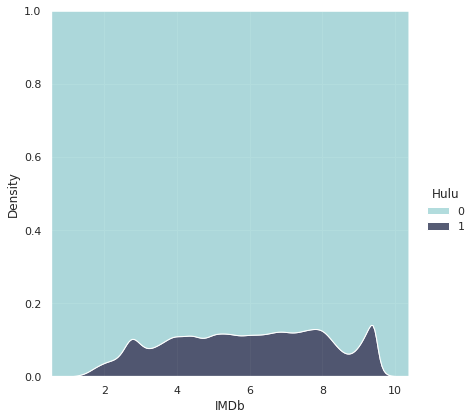

In [24]:
sns.displot(
    data=data,
    x="IMDb", hue="Hulu",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

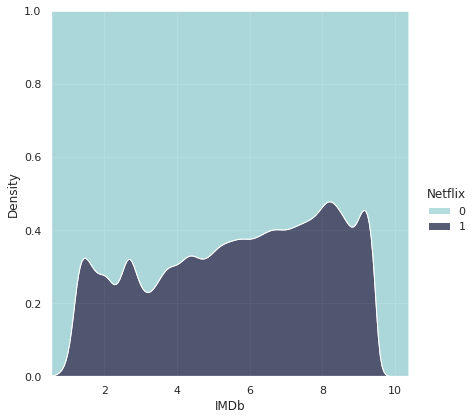

In [25]:
sns.displot(
    data=data,
    x="IMDb", hue="Netflix",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

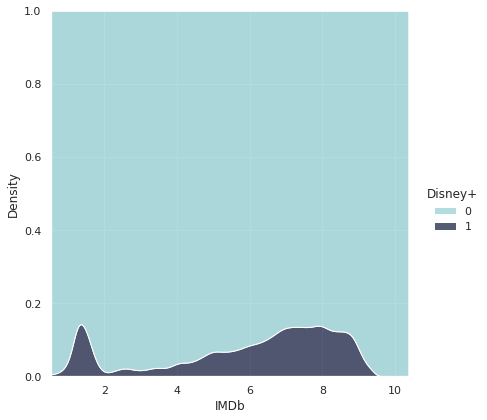

In [26]:
sns.displot(
    data=data,
    x="IMDb", hue="Disney+",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

In [27]:
genres=[]
for s in data.Genres:
  s=str(s)
  l=s.split(sep=",")
  for s2 in l:
    if not( s2 in genres ):
      genres.append(s2)
      data[s2]=0
print(genres)
print(len(genres))
lt=[]
for i,s in enumerate(data.Genres):
  s=str(s)
  if s!= "nan" :
    l=s.split(sep=",")
    for s2 in l:
      data.loc[i,s2]=1

['Biography', 'Crime', 'Drama', 'Action', 'Sport', 'Documentary', 'Musical', 'Comedy', 'Romance', 'Adventure', 'Sci-Fi', 'Mystery', 'Western', 'History', 'Thriller', 'War', 'Music', 'Animation', 'Fantasy', 'Horror', 'Family', 'Short', 'Reality-TV', 'Talk-Show', 'News', 'Film-Noir']
26


In [28]:
import plotly.graph_objects as go
import pandas as pd
fig = go.Figure(data=[go.Surface(z=data.values)])
fig.update_layout(title='IMDB Prediction', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

#Label Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()
#dirators and name
data["Directors"]=encoder.fit_transform(data["Directors"])
data["Title"]=encoder.fit_transform(data["Title"])
data["Country"]=encoder.fit_transform(data["Country"])
data["Language"]=encoder.fit_transform(data["Language"])
data["Genres"]=encoder.fit_transform(data["Genres"])

In [30]:
x=df[['Title', 'Year', 'Netflix', 'Hulu', 'Prime Video', 'Disney+',
       'Directors', 'Genres', 'Country', 'Language', 'Runtime','Action', 'Adventure', 'Sci-Fi', 'Thriller', 'Comedy', 'Western',
       'Animation', 'Family', 'Biography', 'Drama', 'Music', 'War', 'Crime',
       'Fantasy', 'Romance', 'History', 'Mystery', 'Horror', 'Sport',
       'Documentary', 'Musical', 'News', 'Short', 'Reality-TV', 'Film-Noir',
       'Talk-Show']]

y=df['Score']
y2=df['ScoreROTTEN']

#Visualization

In [31]:
import plotly.express as px
df = data
fig = px.scatter(df, x="Directors", y="IMDb", color="Score",
                 title="Score")

fig.show()

Text(0.5, 1.0, 'Directors vs IMDb')

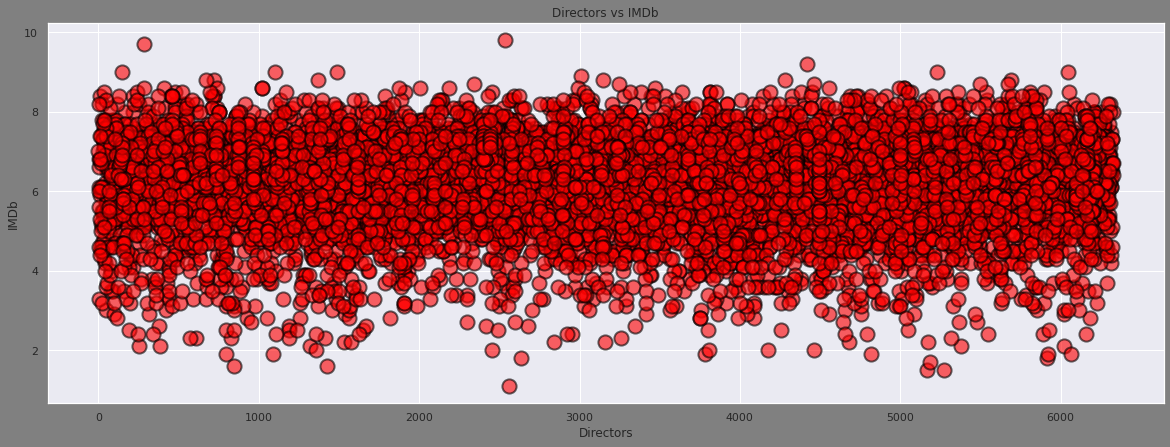

In [32]:
plt.figure(figsize=(20,7),facecolor='grey')
plt.scatter(data.Directors,data.IMDb,color='Red',alpha=0.6,edgecolors='black',
           linewidths=2,s=200)
plt.xlabel("Directors")
plt.ylabel("IMDb")
plt.title ("Directors vs IMDb")

In [33]:
import plotly.express as px
df = data.iloc[:,4:14]
fig = px.parallel_categories(df, color="Score", color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

In [34]:
Run_Time_Imdb=["Runtime","IMDb"]
Run_T_Imdb=data[Run_Time_Imdb]

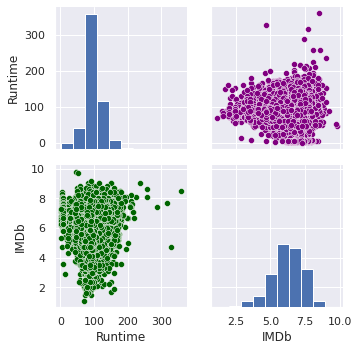

In [35]:
g = sns.PairGrid(Run_T_Imdb)
g.map_upper(sns.scatterplot,color='purple')
g.map_lower(sns.scatterplot, color='darkgreen')
g.map_diag(plt.hist)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

This dataframe has a column name that matches the 'value_name' column name of the resultiing Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.



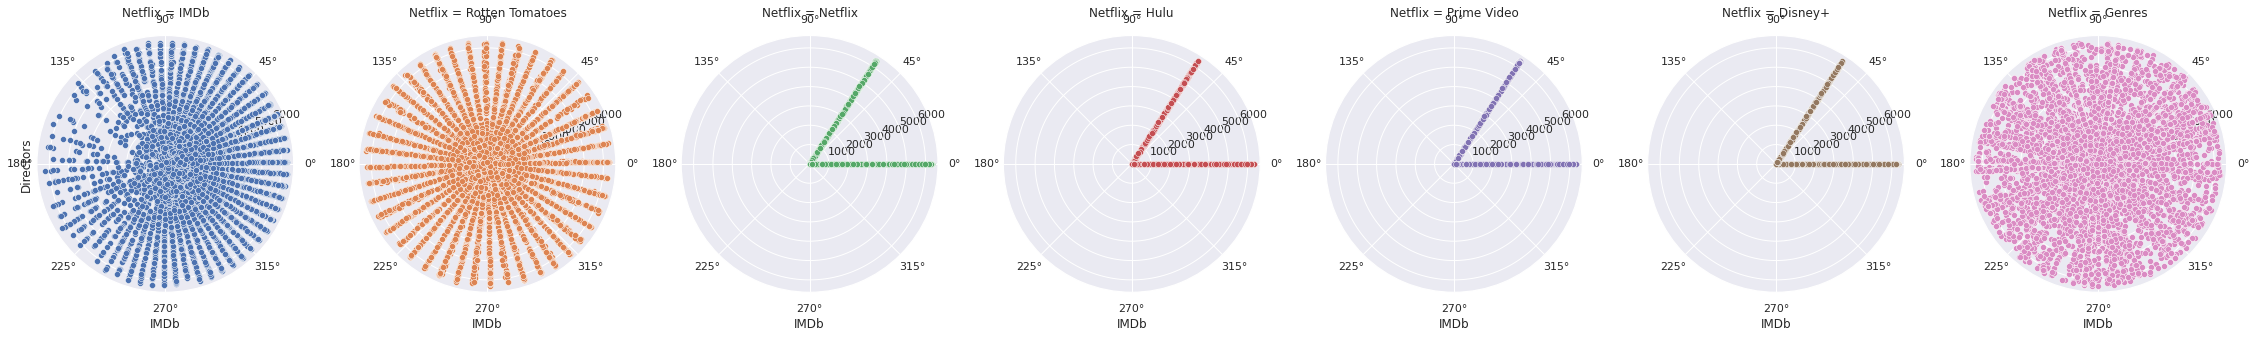

In [36]:
sns.set_theme()
df = data.iloc[:,2:10]
df = pd.melt(df, id_vars=['Directors'], var_name='Netflix', value_name='IMDb')
g = sns.FacetGrid(df, col="Netflix", hue="Netflix",
                  subplot_kws=dict(projection='polar'), height=4.5,
                  sharex=False, sharey=False, despine=False)
g.map(sns.scatterplot, "IMDb", "Directors")

In [37]:
data1=["Score","IMDb","ScoreROTTEN","Rotten Tomatoes"]

In [38]:
rel=data[data1]

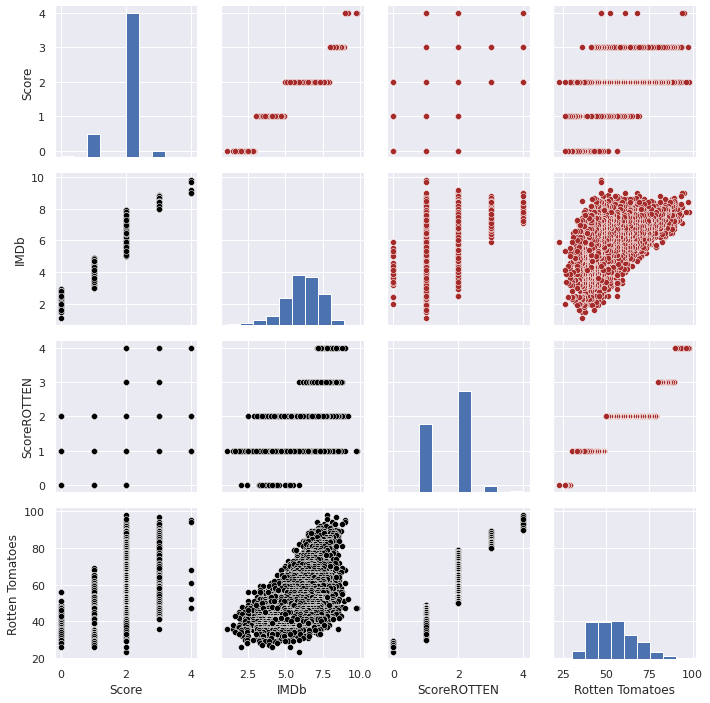

In [39]:
g = sns.PairGrid(rel)
g.map_upper(sns.scatterplot,color='brown')
g.map_lower(sns.scatterplot, color='black')
g.map_diag(plt.hist)

#Train Test Split

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100) #split our data with test size of 20% 


#Feature Selection

In [41]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
Fs=RFE(model)
fit=Fs.fit(x_train,y_train)
fit.support_



array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False, False,  True,  True,  True, False, False,
       False, False,  True, False, False,  True,  True,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False])

In [42]:
scores=pd.DataFrame(fit.support_,columns=["imp_col"])
dfcolumns=pd.DataFrame(x_train.columns)
features_rank=pd.concat([dfcolumns,scores],axis=1)
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,Title,True
1,Year,True
2,Netflix,True
3,Hulu,True
4,Prime Video,True
5,Disney+,False
6,Directors,True
7,Genres,True
8,Country,True
9,Language,True


In [43]:
col_to_use=['Title','Year','Netflix','Prime Video','Directors','Genres','Country','Language','Runtime','Sci-Fi','Thriller','Comedy','Family',
            'Drama','Crime','Fantasy','Romance','Horror']

In [44]:
x_indep=data[col_to_use]


#Important columns

In [45]:
x_ind_no_scale=x_indep.iloc[:7820,:]
x_ind_no_scale

,Title,Year,Netflix,Prime Video,Directors,Genres,Country,Language,Runtime,Sci-Fi,Thriller,Comedy,Family,Drama,Crime,Fantasy,Romance,Horror
ID,,,,,,,,,,,,,,,,,,
0,7143,2019,1,0,3811,733,692,266,209.0,0,0,0,0,1,1,0,0,0
1,1754,2016,1,0,4322,142,317,528,161.0,0,0,0,0,1,0,0,0,0
2,1798,2020,1,0,147,1034,575,66,83.0,0,0,0,0,0,0,0,0,0
3,3872,2001,1,0,531,1217,312,528,224.0,0,0,0,0,1,0,0,0,0
4,7989,2018,1,0,5683,864,692,66,99.0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7815,8192,2015,0,1,837,945,692,66,88.0,0,0,1,0,0,0,0,1,0
7816,6691,2012,0,1,3797,1091,692,66,57.0,0,0,0,0,0,0,0,0,0
7817,3908,2018,0,1,4778,784,692,66,88.0,0,0,1,0,1,1,0,0,0


In [46]:
x_ind_no_scale.columns

Index(['Title', 'Year', 'Netflix', 'Prime Video', 'Directors', 'Genres',
       'Country', 'Language', 'Runtime', 'Sci-Fi', 'Thriller', 'Comedy',
       'Family', 'Drama', 'Crime', 'Fantasy', 'Romance', 'Horror'],
      dtype='object')

#Distribution of data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



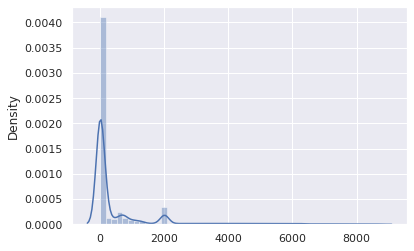

In [47]:
sns.distplot(x_ind_no_scale)

In [48]:
from sklearn.preprocessing import StandardScaler
x_norm=StandardScaler()
x_ind=x_norm.fit_transform(x_ind_no_scale)

#After standard scalar

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



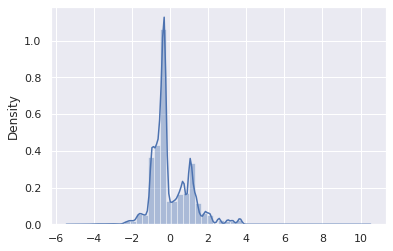

In [49]:
sns.distplot(x_ind)

#Dependent variable

In [50]:
ydep=y[:7820]

In [51]:
ydep.shape


(7820,)

#KNN

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x_ind,ydep,test_size=0.2,random_state=80) #split our data with test size of 20% 
knn=KNeighborsClassifier(n_neighbors=22) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.8312020460358056


#Error rate method

In [53]:
error_rate=[]
for i in range(1,100):                                 #range can be any 
    knn_new=KNeighborsClassifier(n_neighbors=i)
    knn_new.fit(x_train,y_train)
    y_pred_err=knn_new.predict(x_test)
    error_rate.append(np.mean(y_pred_err != y_test))

Text(0, 0.5, 'Error_rate')

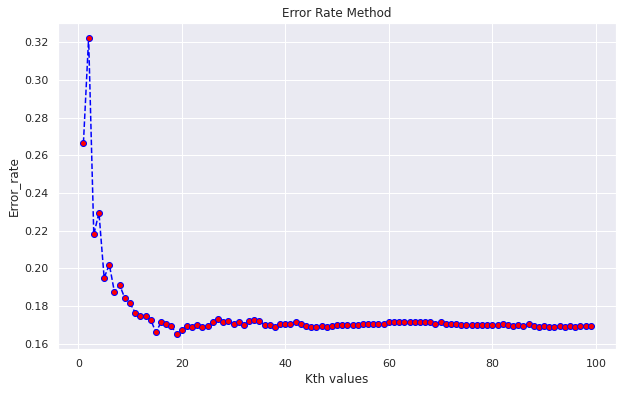

In [54]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red')
plt.title("Error Rate Method")
plt.xlabel('Kth values')
plt.ylabel('Error_rate')

In [55]:
knn_em=KNeighborsClassifier(n_neighbors=19) 
knn_em.fit(x_train,y_train) 
y_pred_em=knn.predict(x_test)  
print('Accuracy=',accuracy_score(y_pred_em,y_test))

Accuracy= 0.8312020460358056


#Svm

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_knn=accuracy_score(y_test,y_pred_em)
results_ = pd.DataFrame([['KNN', accuracy_knn]],
               columns = ['Model','Accuracy',])
results = results_.append(results_, ignore_index = True)

In [57]:

from sklearn.svm import SVC
svc=SVC() 
svc.fit(x_train,y_train) 
y_pred_svm=svc.predict(x_test)  
print('Accuracy=',accuracy_score(y_pred_svm,y_test))


Accuracy= 0.8318414322250639


In [58]:
kernel=['rbf','poly','sigmoid']

In [59]:
for i in kernel:
    model1=SVC(kernel=i)
    model1=model1.fit(x_train,y_train)
    print('kernel:',i)
    print('Accuracy Score:',accuracy_score(y_test,model1.predict(x_test)))

kernel: rbf
Accuracy Score: 0.8318414322250639
kernel: poly
Accuracy Score: 0.8222506393861893
kernel: sigmoid
Accuracy Score: 0.7468030690537084


In [60]:
from sklearn.metrics import accuracy_score
accuracy_svm=accuracy_score(y_test,y_pred_svm)
results_ = pd.DataFrame([['Svm', accuracy_svm]],
               columns = ['Model','Accuracy'])
results = results.append(results_, ignore_index = True)


#Decision Tree

In [61]:
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV
parameters={"max_depth":(10,20,30,40,50,60,70,100),'criterion':('gini','entropy'),
            'max_features':('log2','auto','sqrt'),'min_samples_split':(2,4,6)}
DT_hp=RandomizedSearchCV(tree.DecisionTreeClassifier(),param_distributions=parameters,cv=5)
DT_hp.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (10, 20, 30, 40, 50, 60,
                                                      70, 100),
                                        'max_features': ('log2', 'auto',
                                                         'sqrt'),
                                        'min_samples_split': (2, 4, 6)})

In [62]:
DT_hp.best_estimator_


DecisionTreeClassifier(max_depth=10, max_features='sqrt', min_samples_split=6)

In [63]:
from sklearn.metrics import accuracy_score
DT_model=tree.DecisionTreeClassifier(max_depth=20, max_features='sqrt', min_samples_split=6)
DT_model=DT_model.fit(x_train,y_train)
optimum_DT_=DT_model.predict(x_test)
accuracy_score(y_test,optimum_DT_)

0.731457800511509

In [64]:
from sklearn.metrics import accuracy_score
accuracy_DT=accuracy_score(y_test,optimum_DT_)
results_ = pd.DataFrame([['DecisionTree', accuracy_DT]],
               columns = ['Model','Accuracy'])
results = results.append(results_, ignore_index = True)

#Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
RFC=RandomForestClassifier(random_state=5)
RFC=RFC.fit(x_train,y_train)
RFC_pred=RFC.predict(x_test)
accuracy_score(y_test,RFC_pred)

0.8337595907928389

In [66]:
from sklearn.model_selection import RandomizedSearchCV
parameters={"n_estimators":(100,200,300,600,800,900),"criterion":("gini","entropy"),
            "max_features":("auto","sqrt","log2"),"min_samples_split":(2,4,6),"random_state":(0,1,2,3,4,5)}
a=RandomizedSearchCV(RandomForestClassifier(),param_distributions=parameters,cv=5)
#a.fit(x_train,y_train)

In [67]:
#a.best_estimator_

In [68]:
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x_ind,ydep,test_size=0.2,random_state=100)
optimum_RF_model=RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=200, random_state=2)
optimum_RF_model=optimum_RF_model.fit(x_train,y_train)
optimum_RF_=optimum_RF_model.predict(x_test)
accuracy_score(y_test,optimum_RF_)

0.8337595907928389

In [69]:
from sklearn.metrics import accuracy_score
accuracy_RF=accuracy_score(y_test,optimum_RF_)
results_ = pd.DataFrame([['RandomForest', accuracy_RF]],
               columns = ['Model','Accuracy'])
results = results.append(results_, ignore_index = True)

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(y_test,optimum_RF_)
accuracy_score

0.8337595907928389

#XG boost

In [71]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
parameters={"n_estimators":(100,200,300,600,800,900),"criterion":("gini","entropy"),
            "max_features":("auto","sqrt","log2"),"min_samples_split":(2,4,6),"random_state":(0,1,2,3,4,5)}
b=RandomizedSearchCV(XGBClassifier(),param_distributions=parameters,cv=5)
#b.fit(x_train,y_train)

In [72]:
#b.best_estimator_

In [73]:
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x_ind,ydep,test_size=0.2,random_state=200)
optimum_xg_model=XGBClassifier(criterion='gini', max_features='sqrt', min_samples_split=2,
              objective='multi:softprob', random_state=5)
optimum_xg_model=optimum_xg_model.fit(x_train,y_train)
optimum_xg_=optimum_xg_model.predict(x_test)
accuracy_score(y_test,optimum_xg_)

0.8235294117647058

In [74]:
from sklearn.metrics import accuracy_score
accuracy_xg=accuracy_score(y_test,optimum_xg_)
results_ = pd.DataFrame([['xg_boost', accuracy_xg]],
               columns = ['Model','Accuracy'])
results = results.append(results_, ignore_index = True)

In [75]:
resultss=results.iloc[1:,:]


In [76]:
resultss

,Model,Accuracy
1,KNN,0.831202
2,Svm,0.831841
3,DecisionTree,0.731458
4,RandomForest,0.833760
5,xg_boost,0.823529


#Pickling

In [77]:
import pickle

In [78]:
pickle.dump(optimum_RF_model,open("Imdb.pkl","wb"))

In [79]:
Imdb=pickle.load(open('Imdb.pkl',"rb"))

In [80]:
Imdb

RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=200, random_state=2)

In [81]:
Imdb.predict(x_train)

array([2, 2, 2, ..., 2, 2, 2])

In [82]:
x_train.shape

(6256, 18)

In [83]:
x=pd.DataFrame([1754,2016,1,0,4322,142,317,528,161,0,0,0,0,1,0,0,0,0])

In [84]:
x=x.T

In [85]:
Imdb.predict(x)

array([2])

#Cross validation

In [100]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22,shuffle = True) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','KNN','xg_boost','Random Forest']
models=[SVC(kernel='linear'),SVC(kernel='rbf'),KNeighborsClassifier(n_neighbors=9),XGBClassifier(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,x_train,y_train, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.817300,0.011981
Radial Svm,0.821294,0.009770
KNN,0.809627,0.011199
xg_boost,0.821776,0.011340
Random Forest,0.820176,0.013541


#Checking our model with future data

In [87]:
x_new=x_indep.iloc[7820:,:]

In [88]:
x_new

,Title,Year,Netflix,Prime Video,Directors,Genres,Country,Language,Runtime,Sci-Fi,Thriller,Comedy,Family,Drama,Crime,Fantasy,Romance,Horror
ID,,,,,,,,,,,,,,,,,,
7820,7186,1976,0,1,3377,1,549,633,86.0,0,0,0,0,0,0,0,0,0
7821,5813,2017,0,1,1011,781,692,66,73.0,0,0,1,0,0,0,0,0,0
7822,3849,2019,0,1,2197,781,131,704,90.0,0,0,1,0,0,0,0,0,0
7823,6545,2010,0,1,1625,1282,63,66,55.0,0,0,0,0,0,0,0,0,1
7824,3791,2017,0,1,2563,1348,300,683,136.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8690,5192,2020,0,0,145,1087,692,139,78.0,0,0,0,1,0,0,0,0,0
8691,4242,2017,0,0,4887,1013,692,66,44.0,0,0,0,0,0,0,0,0,0
8692,6354,1980,0,0,1651,407,692,66,60.0,0,0,0,1,1,0,0,0,0


In [89]:
ynew=y[7820:]

In [90]:
ynew.shape

(875,)

In [91]:
from sklearn.metrics import accuracy_score
y_pred_new=knn.predict(x_new)  
knn_acc=accuracy_score(y_pred_new,ynew)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



In [92]:
from sklearn.metrics import accuracy_score
y_new_svm=svc.predict(x_new)  
svm_acc=accuracy_score(y_new_svm,ynew)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning:

X has feature names, but SVC was fitted without feature names



In [93]:
from sklearn.metrics import accuracy_score
optimum_DT_=DT_model.predict(x_new)
DT_acc=accuracy_score(ynew,optimum_DT_)




/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



In [94]:
from sklearn.metrics import accuracy_score
optimum_RF_=optimum_RF_model.predict(x_new)
RF_acc=accuracy_score(ynew,optimum_RF_)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



In [95]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN',
              'Random Forest'],
    'Score': [knn_acc,svm_acc,RF_acc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,0.838857
1,KNN,0.838857
2,Random Forest,0.838857


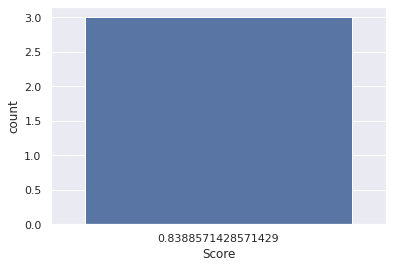

In [96]:
sns.countplot(x="Score",data=models)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



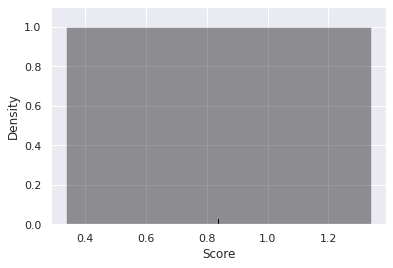

In [97]:
sns.distplot(models["Score"],color="black",rug=True)

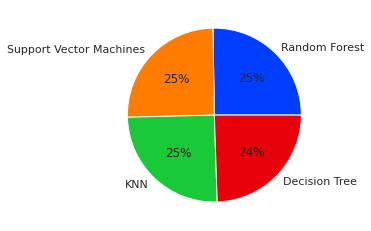

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
#define data
data = [0.843429,0.838857,0.838857,0.817143]
labels = ['Random Forest','Support Vector Machines', 'KNN', 'Decision Tree']
#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]
#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()